<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/05_Transfer_Learning_Tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-22 17:31:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-22 17:31:54 (79.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
# Fetching Data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-06-22 17:31:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 142.250.157.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2021-06-22 17:31:59 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# Check out images & subdir

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir =  "10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE= 32

In [7]:
# Using image_dataset_from_directory insted of ImageDataGenerator as it is better and new version
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir,
                                                                    image_size=IMG_SIZE, 
                                                                    label_mode="categorical",
                                                                    batch_size=BATCH_SIZE,)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                  label_mode="categorical",
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [9]:
# Class Names
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images, labels in train_data.take(1):
  print(images, labels)


tf.Tensor(
[[[[ 72.71429    118.71429    107.71429   ]
   [ 69.571434   115.571434   104.571434  ]
   [ 73.35204    119.35204    108.35204   ]
   ...
   [ 59.78567    114.64286    101.362236  ]
   [ 57.68877    112.97449     99.61734   ]
   [ 56.357143   111.64286     98.28571   ]]

  [[ 73.38265    119.38265    108.38265   ]
   [ 71.86224    117.86224    106.86224   ]
   [ 75.19898    121.19898    110.19898   ]
   ...
   [ 56.173466   116.92857    102.015305  ]
   [ 55.071415   115.85713    100.92856   ]
   [ 54.142857   114.92857    100.        ]]

  [[ 72.57143    118.57143    108.57143   ]
   [ 71.28571    117.28571    107.28571   ]
   [ 73.         119.         109.        ]
   ...
   [ 54.979557   114.21429    102.21429   ]
   [ 54.428574   114.         102.        ]
   [ 54.147934   113.71936    101.71936   ]]

  ...

  [[ 50.27546     96.27546     83.27546   ]
   [ 45.704098    91.7041      78.7041    ]
   [ 54.734924   100.092064    89.30635   ]
   ...
   [ 33.04591     71.831

In [11]:
## Model 0 0 Transer Learning/ using Keras Fucntional API

In [12]:
# 1. Create base model using keras application mode
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

#3. Create imputs 
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. Might need to mormalise input for ResNet50V2 (Dont need to Efficient Net as they have scaling built in if you are using from keras.application)
# X = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
X = base_model(inputs)
print(f"Shape after passing input through base model: {X.shape}")

# 6. Average Pool teh output
X = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(X)
print(f"Shape after GlobalAverage2D: {X.shape}")

# 7. Create the O/P activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(X)

# 8. Combine I/O and O/P
model_0 = tf.keras.Model(inputs, outputs)

16711680/16705208 [==============================] - 0s 0us/step
Shape after passing input through base model: (None, 7, 7, 1280)
Shape after GlobalAverage2D: (None, 1280)


In [14]:
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_0 = model_0.fit(train_data, 
                              epochs=5, 
                              steps_per_epoch=len(train_data), 
                              validation_data = test_data, 
                              validation_steps=(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transer_learning", experiment_name="model_0")])

Saving TensorBoard log files to: transer_learning/model_0/20210622-173311
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 45s 448ms/step - loss: 1.9091 - accuracy: 0.4013 - val_loss: 1.3211 - val_accuracy: 0.7063
Epoch 2/5
24/24 [==============================] - 10s 385ms/step - loss: 1.1424 - accuracy: 0.7373 - val_loss: 0.9210 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - 8s 329ms/step - loss: 0.8513 - accuracy: 0.8013 - val_loss: 0.7627 - val_accuracy: 0.8188
Epoch 4/5
24/24 [==============================] - 9s 380ms/step - loss: 0.6899 - accuracy: 0.8413 - val_loss: 0.6459 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 8s 326ms/step - loss: 0.5966 - accuracy: 0.8507 - val_loss: 0.5777 - val_accuracy: 0.8594


In [16]:
model_0.evaluate(test_data)

79/79 [==============================] - 15s 178ms/step - loss: 0.6085 - accuracy: 0.8384


[0.608518660068512, 0.8384000062942505]

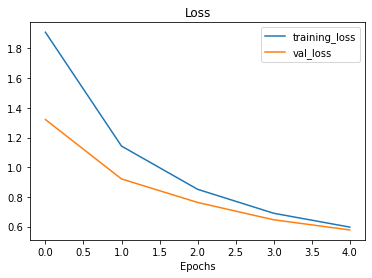

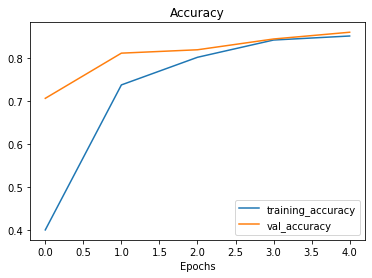

In [15]:
plot_loss_curves(history_model_0)

In [18]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [19]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________